
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [2]:
 x_test.max()

255

In [3]:
x_train.max()

255

In [5]:
x_train = x_train/255
x_test =x_test/255

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

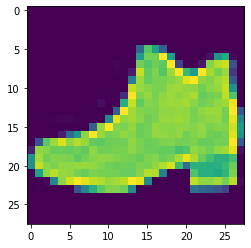

In [11]:
plt.imshow(x_train[15]);

In [12]:
x_train[15].shape

(28, 28)

In [13]:
classes[y_train[15]]

'Ankle boot'

**Reshape the X into 4 dimension**

In [15]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [16]:
x_test = x_test.reshape(10000,28,28,1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [20]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [24]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 64, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
938/938 [==============================] - 82s 83ms/step - loss: 0.4574 - accuracy: 0.8411 - val_loss: 0.3493 - val_accuracy: 0.8781
Epoch 2/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2986 - accuracy: 0.8950 - val_loss: 0.3356 - val_accuracy: 0.8870
Epoch 3/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2644 - accuracy: 0.9069 - val_loss: 0.2809 - val_accuracy: 0.8990
Epoch 4/10
938/938 [==============================] - 77s 82ms/step - loss: 0.2439 - accuracy: 0.9137 - val_loss: 0.2945 - val_accuracy: 0.8975
Epoch 5/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2334 - accuracy: 0.9180 - val_loss: 0.2980 - val_accuracy: 0.8955
Epoch 6/10
938/938 [==============================] - 75s 80ms/step - loss: 0.2254 - accuracy: 0.9217 - val_loss: 0.2808 - val_accuracy: 0.9091
Epoch 7/10
938/938 [==============================] - 73s 77ms/step - loss: 0.2207 - accuracy: 0.9228 - val_loss: 0.2789 - val_accuracy:

**Plot values of metrics you used in your model.**

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.457413,0.841100,0.349292,0.8781
1,0.298633,0.894967,0.335614,0.8870
2,0.264377,0.906950,0.280949,0.8990
3,0.243903,0.913733,0.294532,0.8975
4,0.233401,0.918000,0.297986,0.8955


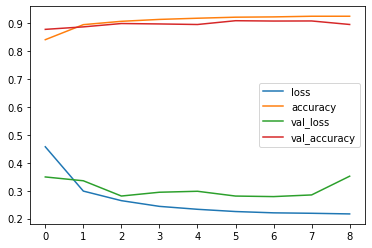

In [26]:
loss_df.plot();

**Train the model using earlystop.**

**Plot values of metrics you used in your model.**

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

['loss', 'acc']

In [27]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3520 - accuracy: 0.8956


[0.3520086109638214, 0.8956000208854675]

In [28]:
from sklearn.metrics import classification_report

In [29]:
preds=np.argmax(model.predict(x_test),axis=1)

In [30]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.94      0.69      0.80      1000
           3       0.93      0.88      0.91      1000
           4       0.72      0.94      0.82      1000
           5       0.99      0.93      0.96      1000
           6       0.71      0.76      0.73      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Prediction

In [31]:
x_test[15]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.07058824],
        [0.03137255],
        [0.        ],
        [0.00392157],
        [0.01960784],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.4627451 ],
        [0.9254902 ],
        [0.83137255],
        [0.95294118],
        [0.90196078],
        [0.93333333],
        [1.        ],
        [0.94509804],
        

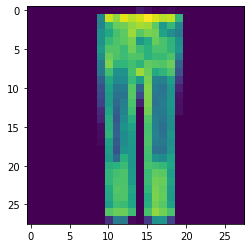

In [32]:
plt.imshow(x_test[15])

In [33]:
y_cat_test[15]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
classes[1]

'Trouser'

In [36]:
img=x_test[15]

In [37]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [38]:
model.predict(resized_img)

array([[6.67043807e-08, 9.99997854e-01, 5.13230902e-10, 3.10406165e-07,
        1.57069712e-06, 4.75012824e-12, 1.79192440e-07, 1.42476335e-11,
        1.75350701e-09, 4.04095030e-12]], dtype=float32)

In [39]:
np.argmax(model.predict(resized_img))

1

In [40]:
classes[1]

'Trouser'

In [42]:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")

T-shirt/top    0.0
Trouser        1.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Trouser



# End of Assignment